# 1. 지도학습 비지도학습 모델
365p

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris = datasets.load_iris()

#종속변수 지정
y=iris.target

#train/test 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(iris['data'], y, test_size=0.3,
                                                                   random_state=0)

#지도학습 모델 중 k-nn 모델 생성
knn = KNeighborsClassifier(n_neighbors = 1)

#모델 학습
knn.fit(train_input, train_label)
#분류기 모델의 결과 예측
predict_label = knn.predict(test_input)
#정확도 확인
print('test accuracy {:,.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.98


369p

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


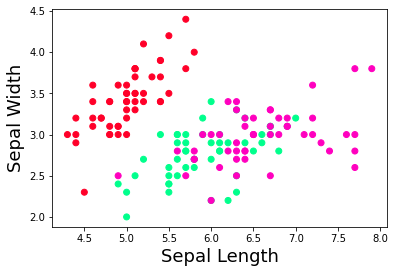

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

#데이터 불러오기
iris = datasets.load_iris()
#종족 변수 지정
X = iris.data[:, :2]
y = iris.target

#"Sepal length"와 "Sepal width" 컬럼 두개만 추출하여
#스캐터 플롯으로 확인
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

#비지도학습 모델
KMeans = KMeans(n_clusters=3, n_jobs=4, random_state=21)

#모델 학습
KMeans.fit(X)
#중심점 출력
centers = KMeans.cluster_centers_
print(centers)

Text(0.5, 1.0, 'Predicted')

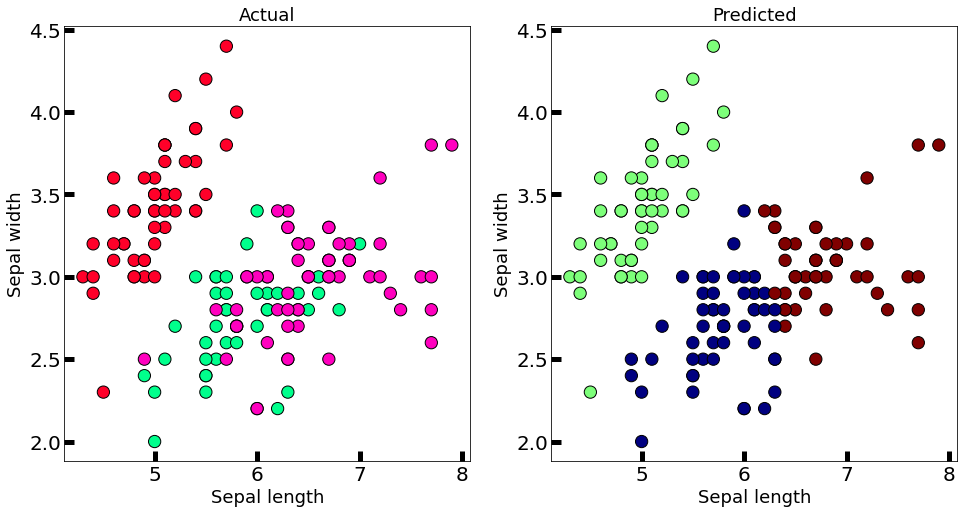

In [4]:
#원본 데이터와 클러스터링 결과 비교
new_labels = KMeans.labels_
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:,0], X[:,1], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length = 10, width = 5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length = 10, width = 5, colors='k', labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# 2. 인공신경망 모델
376p

In [1]:
#케라스
import keras
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 불러오기
x = numpy.array([0,1,2,3,4,5])
y = x*2+1
print(x)
print(y)

Using TensorFlow backend.


[0 1 2 3 4 5]
[ 1  3  5  7  9 11]


In [2]:
#ANN 모델 정의
model = keras.models.Sequential()

#ANN 층 설정
#입력노드 1개, 가중치 1개, 선형모델
model.add(keras.layers.Dense(1, input_shape=(1,)))

#ANN모델 설정
#최적화 알고리즘: 확률적 경사하강법
#손실함수: 평균제곱오차
model.compile(optimizer='SGD', loss='mse', metrics=["accuracy"])

#ANN모델 학습
#전체 데이터중 2개를 이용 입출력 신호 지정
#Epochs: 반복 학습 횟수
#verbose 학습진행 상황
hist = model.fit(x[:2], y[:2], epochs=1000, verbose=0)

#ANN모델 평가
print('Targets', y[2:])
print('Predictions', model.predict(x[2:]).flatten())

#모델 요약
model.summary()

Targets [ 5  7  9 11]
Predictions [ 5.0001845  7.0003176  9.000451  11.000585 ]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [3]:
"""모델 정보 출력"""
l1 = model.layers[0]

print("name: {},\n type: {},\n shape: {},\n activation:{}, \n params: {}".format(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()))

name: dense_1,
 type: <class 'keras.layers.core.Dense'>,
 shape: (None, 1),
 activation:linear, 
 params: 2


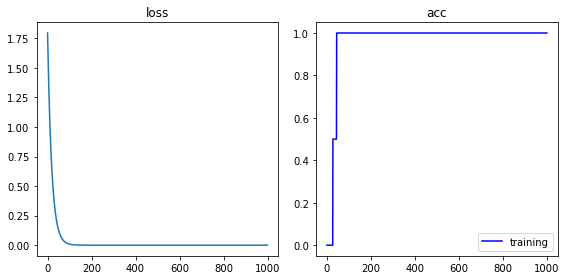

In [4]:
"""결과 시각화"""
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history["loss"])
plt.title("loss")

plt.subplot(1,2,2)
plt.title("acc")
plt.plot(hist.history["accuracy"], 'b-', label = "training")
plt.legend()
plt.tight_layout()
plt.show()

380p

In [5]:
#필요한 라이브러리 불러오기
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

#MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#이미지 데이터 준비하기

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

11493376/11490434 [==============================] - 3s 0us/step


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  0  0  0  0 

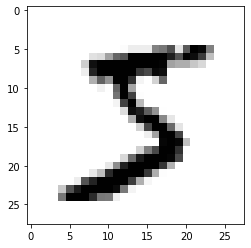

In [6]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for x in train_images[0]:
    for i in x:
        print('{:3}'.format(i), end="")
print()
plt.imshow(train_images[0], cmap='binary')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

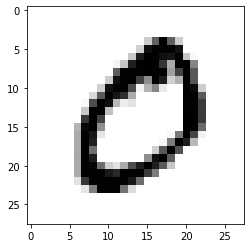

In [7]:
#두 번째 데이터
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for x in train_images[1]:
    for i in x:
        print("{:3}".format(i), end="")
    print()

plt.imshow(train_images[1], cmap='binary')

In [11]:
#레이블을 범주형으로 인코딩
train_labels = to_categorical(train_labels)
train_labels = to_categorical(test_labels)

383p

In [12]:
# Sequential 클래스 사용 모델 정의
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

#모델 컴파일하기
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# fit()메서드로 모델 훈련
hist = model.fit(train_images, train_labels, epochs = 5, batch_size=128)

# 테스트 데이터로 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
model.summary()

ValueError: Error when checking input: expected dense_4_input to have 2 dimensions, but got array with shape (60000, 28, 28)

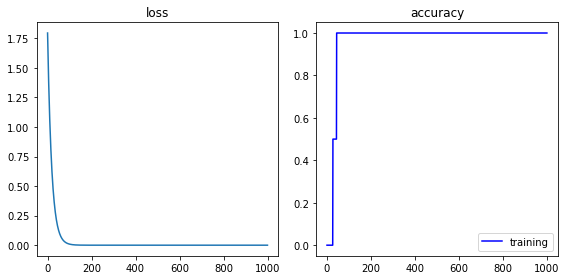

In [14]:
import matplotlib as mpl
import matplotlib.pylab as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1,2,2)

plt.title('accuracy')
plt.plot(hist.history["accuracy"], 'b-', label = "training")
#plt.plot(model.history['vla_accuracy'], 'r:',label ='validation')
plt.legend()
plt.tight_layout()
plt.show()